<a href="https://colab.research.google.com/github/zimo27/Anonimity/blob/main/ana_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean piazza data

What we have: \\
1. Cleaned Piazza
2. Cleaned Bckgrd

Need: \\
3. Cleaned Google form data \\
Which form?
https://docs.google.com/document/d/10E1kQIbplL8A6XRB6jbZ72rFCr8EET7ksJZr9US9aGg/edit?usp=sharing

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
con = pd.read_csv("contributions.csv")

## remove instructors

In [ ]:
instructor_data = pd.read_csv("piazza-stats.csv")
instructors = []
# 26 instructors
for i in range(0,26):
    instructors.append(instructor_data.loc[i, "name"])
#instructors

# remove instructor contributions
for name in instructors:
  con.drop(con.index[(con["Name"] == name)],axis=0,inplace=True)
con.shape

(1864, 11)

After removal, we have 1864 rows

## remove not enrolled

In [ ]:
con.drop(con.index[(con["Email"] == "Not currently enrolled")],axis=0,inplace=True)
con.shape


(1841, 11)

After removal, we have 1841 rows

## remove fully anonymous

In [ ]:
con.drop(con.index[(con["Anonymous"] == "full")],axis=0,inplace=True)
x = 1841-1656
percent = (1841-1656)/1841
print(x, percent)

con.shape

185 0.10048886474741989


(1656, 11)

After removal, we have 1656 rows \\
So 10% contributions are completely anonymous

In [ ]:
con

,Anonymous,Post Number,Folders,Created At,Submission,Submission HTML Removed,Subject,Part of Post,Name,Email,Endorsed by Instructor
4,no,8,logistics,2022-03-24 00:59:24 UTC,"Hello, I was wondering if there would be a rem...","Hello, I was wondering if there would be a rem...",Remote Option Available for CSE 15L,started_off_question,Samuel Genous Jr.,sgenous@ucsd.edu,False
9,no,8,logistics,2022-03-24 02:33:07 UTC,What about the lectures? Will they have a remo...,What about the lectures? Will they have a remo...,Remote Option Available for CSE 15L,followup,Samuel Genous Jr.,sgenous@ucsd.edu,NaN
11,no,8,logistics,2022-03-24 02:40:15 UTC,How exactly do I go about getting approval for...,How exactly do I go about getting approval for...,Remote Option Available for CSE 15L,reply_to_followup,Samuel Genous Jr.,sgenous@ucsd.edu,NaN
13,no,8,logistics,2022-03-24 02:49:36 UTC,I just sent an email to Mr. Gungor talking abo...,I just sent an email to Mr. Gungor talking abo...,Remote Option Available for CSE 15L,reply_to_followup,Samuel Genous Jr.,sgenous@ucsd.edu,NaN
22,stud,11,other; logistics; exam,2022-03-24 04:27:59 UTC,<p>Hi!</p>\n<p></p>\n<p>I know that this class...,Hi!\n\nI know that this class will use iClicke...,iClicker / Final Exam,updated_question,Elijah Prado,eprado@ucsd.edu,False
...,...,...,...,...,...,...,...,...,...,...,...
3112,no,909,logistics,2022-06-15 19:59:56 UTC,"<md>Hello, my name is Hongchao Hu (PID: A16631...","Hello, my name is Hongchao Hu (PID: A16631084)...",Academic history grade,started_off_question,Hongchao Hu,hohu@ucsd.edu,False
3113,no,910,logistics,2022-06-16 00:49:04 UTC,"<p style=""text-align:left"">Good evening,</p>\n...","Good evening,\n I have a quick question, regar...",Grade Question,started_off_question,Cassandra Ponce Maldonado,cponcemaldonado@ucsd.edu,False
3114,no,911,logistics,2022-06-16 03:00:30 UTC,<p>I was wondering what the grading cutoffs fo...,I was wondering what the grading cutoffs for t...,grading cutoffs,updated_question,Vatsal Bagri,vabagri@ucsd.edu,False
3115,no,911,logistics,2022-06-16 03:00:16 UTC,<p>I was wondering what the grading cutoffs fo...,I was wondering what the grading cutoffs for t...,grading cutoffs,started_off_question,Vatsal Bagri,vabagri@ucsd.edu,False


# anonymize pre-survey data

In [ ]:
pre = pd.read_csv("presurvey.csv")

# Deid_dict contains (email, Deid) pairs
Deid_dict = {'X': 2}

# Insert email
index = 0
Deid = []
for email in pre["Username"]:
  Deid_dict[email] = index
  Deid.append(index)
  index+=1

Deid_dict.pop("X")
#print(hashtable)

# Remove indentity info 
pre.drop(pre.columns[[1,2,3,19]],axis=1,inplace=True)

pre["Deid"] = Deid
#print(pre)

In [ ]:
count_total_mal = 0
count_total_fe = 0
i=0
for id in pre["Deid"]:
  if (id != 999):

    if (pre["What are your Preferred Pronouns?"][id] == "he/him/his"):
      count_total_mal+=1


    #if female
    else:
      count_total_fe += 1
  i+=1

print(count_total_mal, count_total_fe)


326 139


In [ ]:
pre

,Timestamp,What are your Preferred Pronouns?,What is your race? Select all that apply.,What is your age range?,What is your school year?,What is your major?,"Before taking CSE 15L this quarter, did you have any prior knowledge in software tools (i.e. unix terminal commands, Git/GitHub, debugging and testing Java programs, etc.)?",What is the main reason you're taking this course?,"On a scale of 1 to 5, how confident are you about your ability to do well in this course?","What is the MINIMUM grade you think you would be satisfied with in this course? If you're taking this course pass/no-pass, note that C- is the threshold for passing.",Are you a native English speaker?,What is your fluency in English?,What are you looking forward to the most about taking this class?,What do you fear the most about taking this class?,How are you feeling about this class after the first day of lecture?,"If there are is anything else that you would like our CSE 15L course staff to know so that we could better help you learn in this course, please let us know here.",Deid
0,2022/03/29 9:05:52 PM MDT,he/him/his,Asian or Asian American,18 - 22 years,Undergraduate 1st year,Computer Engineering (ECE26),Yes,To fulfill a major requirement (for your curre...,4,A-,Yes,I learned English as a child in a bilingual or...,Learning useful programming tips that I could ...,Not being able to access the software or mater...,I feel confident and comfortable.,"At first glance, the class seems super chill a...",0
1,2022/03/29 11:23:08 PM MDT,she/her/hers,Asian or Asian American,18 - 22 years,Undergraduate 1st year,Mathematics-Computer Science,Yes,To fulfill a major requirement (for your curre...,5,A,Yes,I learned English as a child as my primary lan...,Getting to learn more skills that are applicab...,Coding in pairs/groups.,I already know a lot of the earlier content an...,NaN,1
2,2022/03/29 11:26:21 PM MDT,he/him/his,White or Caucasian,23 - 27 years,Undergraduate 5th year,Math-Cs,Yes,To fulfill a major requirement (for your curre...,5,A-,Yes,I learned English as a child as my primary lan...,Better skills in testing and debugging,My I-clicker never coming out of the UCSD mail...,Pretty good,NaN,2
3,2022/03/30 12:42:00 AM MDT,he/him/his,Asian or Asian American,18 - 22 years,Undergraduate 1st year,Undeclared,No,To switch to a CSE major,3,A-,Yes,I learned English as a child as my primary lan...,Setting uh github,Falling behind or not understanding concepts,"Quite neutral, although somewhat at ease",NaN,3
4,2022/03/30 1:03:25 AM MDT,he/him/his,Asian or Asian American,18 - 22 years,Undergraduate 1st year,Mathematics-Computer Science,Yes,To fulfill a major requirement (for your curre...,3,B-,Yes,I learned English as a child as my primary lan...,I want to learn about GitHub Pages.,The extent to my coding capabilities.,It was very good.,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,2022/04/06 11:52:08 AM MDT,she/her/hers,Asian or Asian American,18 - 22 years,Undergraduate 3rd year,Cog sci ML,Yes,To fulfill a minor requirement,3,A-,Yes,I learned English as a child in a bilingual or...,Whatever I know about software tools is self t...,I think I’m afraid I’m going to confuse progra...,Great,NaN,460
461,2022/04/06 12:17:48 PM MDT,he/him/his,White or Caucasian,18 - 22 years,Undergraduate 1st year,Computer Science,Yes,To fulfill a major requirement (for your curre...,3,A,Yes,I learned English as a child as my primary lan...,Learning useful tools,Not doing well,Pretty okay,NaN,461
462,2022/04/06 1:18:31 PM MDT,he/him/his,African American or Black;Chicanx or Latinx;Wh...,18 - 22 years,Undergraduate 2nd year,Cognitive Science Machine learning,Yes,To fulfill a minor requirement,5,A-,Yes,I learned English as a child as my primary lan...,Being able to add to my coding skills is very ...,"in all honesty Im not too afraid, the only fea...",I'm very excited,NaN,462
463,2022/04/06 2:33:54 PM MDT,she/her/hers,Asian or Asian American,18 - 22 years,Undergradu

465 students filled out pre-survey

# anonymize piazza data

In [ ]:
the_Deid = []
x = 0
for Email in con["Email"]:
  if (Email in Deid_dict):
      the_Deid.append(Deid_dict[Email])
      x+=1
  else:
      the_Deid.append(999)

print(x)
# Remove indentity info 
con.drop(con.columns[[8,9]],axis=1,inplace=True)
con["Deid"] = the_Deid

print(np.unique(the_Deid).size)

1471
260


out of 1656 contributions, only 1471 of them are contributed by 259 unique students who filled out the pre-survey, for students who did not fill out the pre-survey, they have Deid 999.

In [ ]:
con

,Anonymous,Post Number,Folders,Created At,Submission,Submission HTML Removed,Subject,Part of Post,Endorsed by Instructor,Deid
4,no,8,logistics,2022-03-24 00:59:24 UTC,"Hello, I was wondering if there would be a rem...","Hello, I was wondering if there would be a rem...",Remote Option Available for CSE 15L,started_off_question,False,25
9,no,8,logistics,2022-03-24 02:33:07 UTC,What about the lectures? Will they have a remo...,What about the lectures? Will they have a remo...,Remote Option Available for CSE 15L,followup,NaN,25
11,no,8,logistics,2022-03-24 02:40:15 UTC,How exactly do I go about getting approval for...,How exactly do I go about getting approval for...,Remote Option Available for CSE 15L,reply_to_followup,NaN,25
13,no,8,logistics,2022-03-24 02:49:36 UTC,I just sent an email to Mr. Gungor talking abo...,I just sent an email to Mr. Gungor talking abo...,Remote Option Available for CSE 15L,reply_to_followup,NaN,25
22,stud,11,other; logistics; exam,2022-03-24 04:27:59 UTC,<p>Hi!</p>\n<p></p>\n<p>I know that this class...,Hi!\n\nI know that this class will use iClicke...,iClicker / Final Exam,updated_question,False,29
...,...,...,...,...,...,...,...,...,...,...
3112,no,909,logistics,2022-06-15 19:59:56 UTC,"<md>Hello, my name is Hongchao Hu (PID: A16631...","Hello, my name is Hongchao Hu (PID: A16631084)...",Academic history grade,started_off_question,False,135
3113,no,910,logistics,2022-06-16 00:49:04 UTC,"<p style=""text-align:left"">Good evening,</p>\n...","Good evening,\n I have a quick question, regar...",Grade Question,started_off_question,False,372
3114,no,911,logistics,2022-06-16 03:00:30 UTC,<p>I was wondering what the grading cutoffs fo...,I was wondering what the grading cutoffs for t...,grading cutoffs,updated_question,False,61
3115,no,911,logistics,2022-06-16 03:00:16 UTC,<p>I was wondering what the grading cutoffs fo...,I was wondering what the grading cutoffs for t...,grading cutoffs,started_off_question,False,61


In [ ]:
con.drop(con.index[(con["Deid"] == 999)],axis=0,inplace=True)
(con.shape)

(1471, 10)

# Clean Week 3 Data

## Need to remove duplicate answers 

In [ ]:
w3 = pd.read_csv("week3.csv")

w3 = w3.dropna(subset=['If zoom chat had the option to anonymously ask questions for online lectures (i.e., remove names from chats), would you ask more questions?'])
w3.shape

w3

,Timestamp,Username,Review: Which option contains only local Git operations?,Review: Which one is a correct Markdown link format?,"Assume that you created a branch called “dev” in your GitHub project. When you make changes to the main branch, these changes are visible to the which branch?",Which one is not a bad debugging practice?,"If zoom chat had the option to anonymously ask questions for online lectures (i.e., remove names from chats), would you ask more questions?",What is one key idea that you learned in today's class? (2 - 3 sentences),What questions do you still have about today's lecture? OR What did you find anything confusing about today's lecture?
0,2022/04/13 6:05:53 PM MDT,sbharvirkar@ucsd.edu,"pull, merge, commit",[](<URL>),NaN,NaN,"Yes, I would ask more questions if I had the o...",NaN,NaN
1,2022/04/13 6:08:47 PM MDT,yiw092@ucsd.edu,"pull, push, add",[](<URL>),NaN,NaN,"Yes, I would ask more questions if I had the o...",NaN,NaN
2,2022/04/13 6:08:59 PM MDT,tkiyohar@ucsd.edu,"add, init, commit",NaN,NaN,NaN,"No, I would ask a similar number of questions ...",NaN,NaN
3,2022/04/13 6:09:17 PM MDT,httrieu@ucsd.edu,"pull, merge, commit",NaN,NaN,NaN,"No, I would ask a similar number of questions ...",NaN,NaN
4,2022/04/13 6:09:20 PM MDT,syy001@ucsd.edu,"add, init, commit",[](<URL>),NaN,NaN,"No, I would ask a similar number of questions ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
1142,2022/04/15 11:42:32 PM MDT,dyjun@ucsd.edu,NaN,NaN,NaN,NaN,"Yes, I would ask more questions if I had the o...",I learned how to use branches in GitHub. I als...,I did find some stuff about the branches to be...
1143,2022/04/16 12:53:15 AM MDT,yuz120@ucsd.edu,"pull, merge, commit",[](<URL>),Both dev and main branches,Reading the documentation and then try to solv...,"No, I would ask a similar number of questions ...",I learned about the main (master) branch,I have questions about where I could find a sy...
1144,2022/04/18 1:35:01 PM MDT,r2song@ucsd.edu,NaN,NaN,Both dev and main branches,Reading the documentation and then try to solv...,"No, I would ask a similar number of questions ...",I learned about the process and steps to debug...,NaN
1146,2022/04/19 8:41:10 PM MDT,t1quach@ucsd.edu,NaN,NaN,NaN,Reading the documentation and then try to solv...,"No, I would ask a similar number of questions ...",I learned about branches and hơ to debug. I al...,I dont have any for now


In [ ]:

w3_dict = {'X': 2}


i = 0
x = 0
the_Deid = []
for Email in w3["Username"]:
  # 343 by removing "and Deid_dict[Email] not in w3_dict"
  if (Email in Deid_dict and Deid_dict[Email] not in w3_dict ):
      the_Deid.append(Deid_dict[Email])
      w3_dict[Deid_dict[Email]] = w3.iloc[i][6]
      x+=1
  else:
      the_Deid.append(999)
  i+=1

w3_dict.pop("X")

w3["Deid"] = the_Deid
w3.drop(w3.columns[[0,1,2,3,4,5,7,8]],axis=1,inplace=True)
print("out of the ", i," answers, 343 students filled the pre-survey, ", x, " are unique")



out of the  398  answers, 343 students filled the pre-survey,  272  are unique


In [ ]:
print(len(w3_dict))
ct = 0
for key in w3_dict:
  if (w3_dict[key] == "Yes, I would ask more questions if I had the option to be completely anonymous."):
    ct+=1
print(ct, "answered Yes")

272
127 answered Yes


In [ ]:
w3

,"If zoom chat had the option to anonymously ask questions for online lectures (i.e., remove names from chats), would you ask more questions?",Deid
0,"Yes, I would ask more questions if I had the o...",49
1,"Yes, I would ask more questions if I had the o...",999
2,"No, I would ask a similar number of questions ...",303
3,"No, I would ask a similar number of questions ...",999
4,"No, I would ask a similar number of questions ...",57
...,...,...
1142,"Yes, I would ask more questions if I had the o...",242
1143,"No, I would ask a similar number of questions ...",999
1144,"No, I would ask a similar number of questions ...",106
1146,"No, I would ask a similar number of questions ...",436


#Clean Week 9 Data

In [ ]:
w9 = pd.read_csv("week9.csv")
w9

,Timestamp,Username,What is one key idea that you learned from Elayamani? (2 - 3 sentences),What question(s) do you have for Elayamani? OR What did you find confusing about Elayamani's lecture?,"Feedback for Elayamani's Guest Lecture: If you learned something useful from our guest speaker Elayamani and/or would like to express your gratitude, please write them here.",What is one key idea that you learned from Santhosh? (2 - 3 sentences),What question(s) do you have for Santhosh? OR What did you find confusing about Santhosh's lecture?,"Feedback for Santhosh's Guest Lecture: If you learned something useful from our guest speaker Santhosh and/or would like to express your gratitude, please write them here.",What is overall feedback on the guest lectures? How useful were they for you personally? Would you recommend having guest speakers from industry in future CSE 15L courses? Why or Why not?,"Please choose where you rank convenience and anonymity with respect to each other, select the first option if anonymity doesn't affect you.","Given you had the option to be anonymous to everyone (including the professor and staff) when asking questions as opposed to anonymous to only your classmates, would you ask more questions?"
0,2022/05/25 6:11:19 PM MDT,tcarman@ucsd.edu,CD helps get the 'best version of the product ...,NaN,NaN,NaN,NaN,NaN,NaN,2: I’d be willing to go to a third-party websi...,Yes
1,2022/05/25 6:14:50 PM MDT,xil171@ucsd.edu,This is a very good way for software developer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/05/25 6:19:44 PM MDT,hoy013@ucsd.edu,NaN,"No questions so far, it is been really clear.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022/05/25 6:20:17 PM MDT,hbailey@ucsd.edu,continuous development to easier deploy code t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/05/25 6:35:00 PM MDT,lez002@ucsd.edu,java,no good,NaN,NaN,NaN,NaN,NaN,I am indifferent towards anonymity,Yes
...,...,...,...,...,...,...,...,...,...,...,...
511,2022/05/29 12:27:31 PM MDT,luyou@ucsd.edu,I learned that it is very interesting to build...,I don't have question.,"I really enjoy Elayamani's Guest Lecture, it i...",I learned how to use git openssl. I think the ...,I don't have question.,I think Santhosh's Guest Lecture is very usefu...,"I enjoy attending the guest lectures, and I wo...",I am indifferent towards anonymity,Yes
512,2022/05/31 10:41:42 AM MDT,kkhant@ucsd.edu,I learned that programming in general is chall...,nothing in general,It's great to hear from some professional talk...,I learned his experiences in different positio...,nothing in general,Thank you so much for giving time to talk here.,"Yes, it would be super helpful to students sin...",I would really only ask questions anonymously ...,Yes
513,2022/05/31 5:22:12 PM MDT,njhernandez@ucsd.edu,I learned about the importance of continous de...,I did not find anything confusing.,Thank you for presenting to our class.,I learned about different debugging tools like...,I did not find anything confusing,Thank you for presenting to our class.,I would recommend having guest lecturers becau...,I’d be willing to download an app,Yes
514,2022/06/01 12:12:21 PM MDT,kehu@ucsd.edu,Continuous delivery allows for users to consis...,Would continuous delivery have risks of causin...,I learned the application and motive behind wh...,Cscope is an important debugging tool that mak...,I was not confused on the lecture and was able...,Thank you for showing us some of the most comm...,The guest lectures were very useful for me. I ...,I am indifferent towards anonymity,No


In [ ]:
w9 = pd.read_csv("week9.csv")

w9 = w9.dropna(subset=["Please choose where you rank convenience and anonymity with respect to each other, select the first option if anonymity doesn't affect you."])
w9.shape

x = 0
num_yes = 0
the_Deid = []
for Email in w9["Username"]:
  if (Email in Deid_dict):
      the_Deid.append(Deid_dict[Email])
      x+=1
  else:
      the_Deid.append(999)
  
w9["Deid"] = the_Deid
w9.drop(w9.columns[[0,1,2,3,4,5,6,7,8]],axis=1,inplace=True)
print("out of the 252 answers, ", x, "students filled the pre-survey")


out of the 252 answers,  221 students filled the pre-survey


In [ ]:
w9

,"Please choose where you rank convenience and anonymity with respect to each other, select the first option if anonymity doesn't affect you.","Given you had the option to be anonymous to everyone (including the professor and staff) when asking questions as opposed to anonymous to only your classmates, would you ask more questions?",Deid
0,2: I’d be willing to go to a third-party websi...,Yes,46
4,I am indifferent towards anonymity,Yes,464
6,I’d be willing to pay to be anonymous,Yes,369
7,I am indifferent towards anonymity,No,383
9,I’d be willing to pay to be anonymous,Yes,59
...,...,...,...
511,I am indifferent towards anonymity,Yes,218
512,I would really only ask questions anonymously ...,Yes,147
513,I’d be willing to download an app,Yes,306
514,I am indifferent towards anonymity,No,454


# Data Analysis

In [ ]:
con

,Anonymous,Post Number,Folders,Created At,Submission,Submission HTML Removed,Subject,Part of Post,Endorsed by Instructor,Deid
4,no,8,logistics,2022-03-24 00:59:24 UTC,"Hello, I was wondering if there would be a rem...","Hello, I was wondering if there would be a rem...",Remote Option Available for CSE 15L,started_off_question,False,25
9,no,8,logistics,2022-03-24 02:33:07 UTC,What about the lectures? Will they have a remo...,What about the lectures? Will they have a remo...,Remote Option Available for CSE 15L,followup,NaN,25
11,no,8,logistics,2022-03-24 02:40:15 UTC,How exactly do I go about getting approval for...,How exactly do I go about getting approval for...,Remote Option Available for CSE 15L,reply_to_followup,NaN,25
13,no,8,logistics,2022-03-24 02:49:36 UTC,I just sent an email to Mr. Gungor talking abo...,I just sent an email to Mr. Gungor talking abo...,Remote Option Available for CSE 15L,reply_to_followup,NaN,25
22,stud,11,other; logistics; exam,2022-03-24 04:27:59 UTC,<p>Hi!</p>\n<p></p>\n<p>I know that this class...,Hi!\n\nI know that this class will use iClicke...,iClicker / Final Exam,updated_question,False,29
...,...,...,...,...,...,...,...,...,...,...
3112,no,909,logistics,2022-06-15 19:59:56 UTC,"<md>Hello, my name is Hongchao Hu (PID: A16631...","Hello, my name is Hongchao Hu (PID: A16631084)...",Academic history grade,started_off_question,False,135
3113,no,910,logistics,2022-06-16 00:49:04 UTC,"<p style=""text-align:left"">Good evening,</p>\n...","Good evening,\n I have a quick question, regar...",Grade Question,started_off_question,False,372
3114,no,911,logistics,2022-06-16 03:00:30 UTC,<p>I was wondering what the grading cutoffs fo...,I was wondering what the grading cutoffs for t...,grading cutoffs,updated_question,False,61
3115,no,911,logistics,2022-06-16 03:00:16 UTC,<p>I was wondering what the grading cutoffs fo...,I was wondering what the grading cutoffs for t...,grading cutoffs,started_off_question,False,61


## gender

### piazza

In [ ]:
# gender info
# Piazza anonymity
num_not_anonymous = con.index[(con["Anonymous"] == "no")].values.size
print("general pattern: ")
print("Out of " ,con.shape[0], "contributions on piazza, ", num_not_anonymous, " are completely not anonymous ("
, num_not_anonymous*100/1471, "%), ", con.shape[0]-num_not_anonymous, "are anonymous")

#number of male contributors
count_num_mal = 0
#number of anonymous male contributors
count_num_ano_mal = 0
#number of anonymous female contributors
count_num_ano_fe = 0



#number of all male contributions
count_total_mal = 0
#number of anonymous male contributions
count_ano_mal = 0

set_male = {}
set_female = {}
set_ano_male = {}
set_ano_female = {}

i = 0

for id in con["Deid"]:
  #id = row["Deid"]
  #print(id)
  if (id != 999):
    if (pre["What are your Preferred Pronouns?"][id] == "he/him/his"):
      count_total_mal+=1
      set_male[id] = "1"

      #print(con.iloc[0][3])

      if (con.iloc[i][0] != "no"):
        count_ano_mal+=1
        set_ano_male[id] = "1"

    #if female
    else:
      set_female[id] = "1"
      if (con.iloc[i][0] != "no"):
        set_ano_female[id] = "1"
  i+=1





print(" ")
print("Gender info: ")
print("Out of " ,con.shape[0], "contributions on piazza, ", count_total_mal, " are published by",len(set_male)," males (", count_total_mal*100/1471, "%)")
print(con.shape[0]-count_total_mal, " are published by", len(set_female), "females (", 100-(count_total_mal*100/1471), "%)")
print(" ")
print("On average, ",count_total_mal/len(set_male), " per male student, ", (con.shape[0]-count_total_mal)/len(set_female), " per female student" )
print(" ")
print(" ")
print("Out of " ,con.shape[0]-num_not_anonymous, "anonymous contributions on piazza, ", count_ano_mal, " are published by",len(set_ano_male)," males (", count_ano_mal*100/(con.shape[0]-num_not_anonymous), "%)")
print(con.shape[0]-num_not_anonymous-count_ano_mal, " are published by",len(set_ano_female)," females (", 100-(count_ano_mal*100/(con.shape[0]-num_not_anonymous)), "%)")
print(" ")
print("On average, ",count_ano_mal/len(set_ano_male), " per male student, ", (con.shape[0]-num_not_anonymous-count_ano_mal)/len(set_ano_female), " per female student" )
print(" ")
print(" ")
print("Out of " ,num_not_anonymous, "non-anonymous contributions on piazza, ", count_total_mal-count_ano_mal, " are published by 67 males ")
print((con.shape[0]-count_total_mal)-(con.shape[0]-num_not_anonymous-count_ano_mal), " are published by 30 females ")
print(" ")
print("On average, ",(count_total_mal-count_ano_mal)/67, " per male student, ", ((con.shape[0]-count_total_mal)-(con.shape[0]-num_not_anonymous-count_ano_mal))/30, " per female student" )
print(" ")
print(" ")

#print(169/414, 426/1057)


general pattern: 
Out of  1471 contributions on piazza,  876  are completely not anonymous ( 59.55132562882393 %),  595 are anonymous
 
Gender info: 
Out of  1471 contributions on piazza,  1057  are published by 176  males ( 71.85588035350102 %)
414  are published by 83 females ( 28.14411964649898 %)
 
On average,  6.005681818181818  per male student,  4.9879518072289155  per female student
 
 
Out of  595 anonymous contributions on piazza,  426  are published by 109  males ( 71.59663865546219 %)
169  are published by 53  females ( 28.403361344537814 %)
 
On average,  3.908256880733945  per male student,  3.188679245283019  per female student
 
 
Out of  876 non-anonymous contributions on piazza,  631  are published by 67 males 
245  are published by 30 females 
 
On average,  9.417910447761194  per male student,  8.166666666666666  per female student
 
 


### w3

In [ ]:
count_total_mal = 0
count_total_fe = 0
mal_yes = 0
fe_yes = 0
count_yes = 0
i=0
for id in w3["Deid"]:
  if (id != 999):

    if (pre["What are your Preferred Pronouns?"][id] == "he/him/his"):
      count_total_mal+=1

      #print(con.iloc[0][3])

      if (w3.iloc[i][0] != "No, I would ask a similar number of questions regardless of whether or not I had the option to be anonymous."):
        count_yes += 1
        mal_yes += 1
    #if female
    else:
      count_total_fe += 1
      if (w3.iloc[i][0] != "No, I would ask a similar number of questions regardless of whether or not I had the option to be anonymous."):
        count_yes += 1
        fe_yes += 1
  i+=1

print("out of the 272 answers, ", count_yes, "students says yes")
print("out of the", count_total_mal, " male answers, ", mal_yes, "is yes")
print("out of the", count_total_fe, " female answers, ", fe_yes, "is yes")


out of the 272 answers,  127 students says yes
out of the 187  male answers,  82 is yes
out of the 85  female answers,  45 is yes


### w9

In [ ]:
count_total_mal = 0
count_total_fe = 0
mal_yes = 0
fe_yes = 0
count_yes = 0
i=0
for id in w9["Deid"]:
  if (id != 999):

    if (pre["What are your Preferred Pronouns?"][id] == "he/him/his"):
      count_total_mal+=1

      #print(con.iloc[0][3])

      if (w9.iloc[i][1] != "No"):
        count_yes += 1
        mal_yes += 1
    #if female
    else:
      count_total_fe += 1
      if (w9.iloc[i][1] != "No"):
        count_yes += 1
        fe_yes += 1
  i+=1

print("out of the 221 answers, ", count_yes, "students says yes")
print("out of the", count_total_mal, " male answers, ", mal_yes, "is yes")
print("out of the", count_total_fe, " female answers, ", fe_yes, "is yes")


out of the 221 answers,  126 students says yes
out of the 156  male answers,  84 is yes
out of the 65  female answers,  42 is yes


In [ ]:
# English speaking fluency

## consistency


*    how many anonymous contributions on piazza are contributed by students who answered yes in week3 survey?
* how many not anonymous contributions are contributed by the same people?

In [ ]:
count_yes_ano = 0
count_yes_not_ano = 0
count_no_ano = 0
count_no_not_ano = 0
i = 0
for id in con["Deid"]:
  #id = row["Deid"]
  #print(id)
  if (id != 999):
    #if (w3["If zoom chat had the option to anonymously ask questions for online lectures (i.e., remove names from chats), would you ask more questions?"][id] == "Yes, I would ask more questions if I had the option to be completely anonymous."):
    if (id in w3_dict and w3_dict[id] == "Yes, I would ask more questions if I had the option to be completely anonymous.") :
      # half anonymous
      if (con.iloc[i][0] != "no"):
        count_yes_ano+=1
      # completely anonymous
      else:
        count_yes_not_ano +=1
    # people who answered no
    else:
      # half anonymous
      if (con.iloc[i][0] != "no"):
        count_no_ano+=1
      # completely anonymous
      else:
        count_no_not_ano +=1
  i+=1

print(count_yes_ano, count_yes_not_ano, count_no_ano, count_no_not_ano)

print(i)

162 185 433 691
1471


* Out of the 1471 contributions, students who answered yes in week3 survey (127 of them) contributed 347 ones. 162 half-anonymous ones and 185 not anonymous ones. 

* Students who answered no in week3 survey (272-127=145) contributed 1124 ones. 433 half-anonymous ones and 691 not anonymous ones.

The thing is, out of 502 students in the class, 465 filled out the pre-suvey, only 260 of them used piazza (not fully anonymously), only 272 of them answered to week3 survey question.


# Discoveries
1. week 3 and week 9 survey pie chart results are inaccurate due to duplicate answers by the same students

week 3
yes:  46.69117647058823 %
no:  53.30882352941177 %


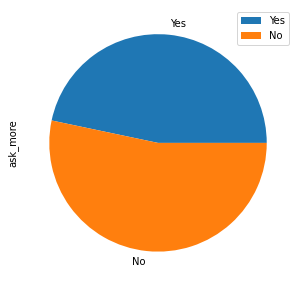

In [ ]:
df = pd.DataFrame({'ask_more': [127, 272-127]},
                  index=['Yes', 'No'])
plot = df.plot.pie(y='ask_more', figsize=(5, 5))
print("week 3")
print("yes: ", 127*100/272, "%")
print("no: ", 100-(127*100/272), "%")

https://docs.google.com/forms/d/1sPrKlCNJPWkLK-LGy68Vqw4MA_cVuxfx8NUhKzfqULU/edit?ts=62563edc#responses

2. Regarding gender, males and females contribute anonymously with an equal proportion to their own proportion to the entire dataset

3. Regarding consistency, no regarding number. yes regarding proportion